In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import pydicom
import os
import glob
import pickle
import pandas as pd
import csv
from pathlib import Path
from IPython.display import HTML
from os import listdir, mkdir
import imageio
from IPython import display
from sklearn.metrics import roc_auc_score, roc_curve, auc
import scipy

import tensorflow as tf
from keras.models import load_model
from keras import layers 
from keras.layers import Concatenate,Input, Dense, Activation, ZeroPadding2D, \
BatchNormalization, Flatten, Conv2D 
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, \
GlobalAveragePooling2D 
from keras.models import Model, Sequential 
from keras.preprocessing import image 
from keras.utils import layer_utils 
from keras.utils.data_utils import get_file 
from keras.applications.imagenet_utils import preprocess_input 
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [5]:
def KerasModel(input_shape):  
    NumClass = 7
    X_input  = Input(input_shape)
     
    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    #Convolução, pelo filtro de kernels cria pela somatoria varias camadas com pedaços da imagem
    X = Conv2D(40, (3, 3), strides = (1, 1), name = 'conv0')(X)    
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    
    ##
    X = Conv2D(24, (3, 3), strides = (1, 1), name = 'conv1')(X)    
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool1')(X)  
    ##
    
    ##
    X = Conv2D(16, (3, 3), strides = (1, 1), name = 'conv2')(X)    
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool2')(X)  
    ##   


    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dropout(0.5)(X)
    X = Dense(NumClass, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='KerasModel')
    
    return model 

In [6]:
number_run = 0
Path         =  "E:/cancer de pele/TRAIN/1/" + str(number_run) + "-Data.pckl"
f = open(Path, 'rb')
[X,Y] = pickle.load(f)

[0, 0, 1, 0, 0, 0, 0]


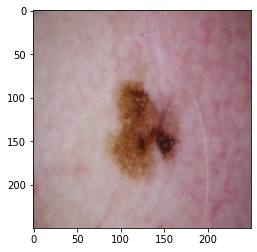

In [7]:
X = X.astype(int)
plt.imshow(X[1])
print(Y[10])

In [8]:
X[0].shape

(250, 250, 3)

In [9]:
# Construct the model
ModelCancer = KerasModel(X[0].shape) # input dimention
# Run the model
ModelCancer.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [10]:
ModelCancer.summary()

Model: "KerasModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 256, 256, 3)       0         
_________________________________________________________________
conv0 (Conv2D)               (None, 254, 254, 40)      1120      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 254, 254, 40)      160       
_________________________________________________________________
activation (Activation)      (None, 254, 254, 40)      0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 127, 127, 40)      0         
_________________________________________________________________
conv1 (Conv2D)               (None, 125, 125, 24)      8

# MUDAR ENDEREÇO

In [11]:
train = 11
p1 = "E:/cancer de pele/"
# load model
ModelCancer = load_model(p1 + 'rede1/modelo/' + str(train-1) + '/ModelCancer-10.h5') 


Epoch 1/13
13/13 [==============================] - 83s 6s/step - loss: 0.0404 - accuracy: 0.9703 - val_loss: 0.5642 - val_accuracy: 0.5514
Epoch 2/13
13/13 [==============================] - 85s 7s/step - loss: 0.0391 - accuracy: 0.9728 - val_loss: 0.8578 - val_accuracy: 0.5371
Epoch 3/13
13/13 [==============================] - 83s 6s/step - loss: 0.0351 - accuracy: 0.9827 - val_loss: 0.5265 - val_accuracy: 0.5329
Epoch 4/13
13/13 [==============================] - 84s 6s/step - loss: 0.0286 - accuracy: 0.9827 - val_loss: 0.5940 - val_accuracy: 0.5957
Epoch 5/13
13/13 [==============================] - 83s 6s/step - loss: 0.0298 - accuracy: 0.9827 - val_loss: 0.5920 - val_accuracy: 0.5357
Epoch 6/13
13/13 [==============================] - 83s 6s/step - loss: 0.0194 - accuracy: 0.9951 - val_loss: 0.6303 - val_accuracy: 0.5814
Epoch 7/13
13/13 [==============================] - 82s 6s/step - loss: 0.0163 - accuracy: 0.9951 - val_loss: 0.5520 - val_accuracy: 0.5700
Epoch 8/13
13/13 [==

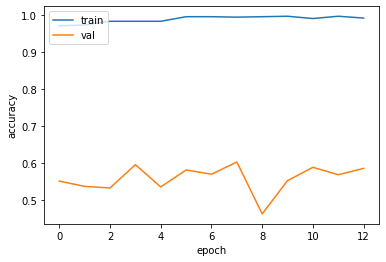

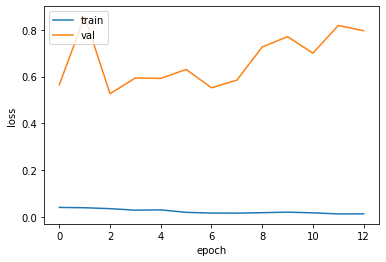

Epoch 1/13
13/13 [==============================] - 83s 6s/step - loss: 0.0458 - accuracy: 0.9604 - val_loss: 0.6586 - val_accuracy: 0.5557
Epoch 2/13
13/13 [==============================] - 90s 7s/step - loss: 0.0364 - accuracy: 0.9790 - val_loss: 0.9050 - val_accuracy: 0.4743
Epoch 3/13
13/13 [==============================] - 85s 7s/step - loss: 0.0306 - accuracy: 0.9815 - val_loss: 0.7676 - val_accuracy: 0.5700
Epoch 4/13
13/13 [==============================] - 82s 6s/step - loss: 0.0271 - accuracy: 0.9815 - val_loss: 0.8012 - val_accuracy: 0.4371
Epoch 5/13
13/13 [==============================] - 85s 7s/step - loss: 0.0293 - accuracy: 0.9827 - val_loss: 0.8274 - val_accuracy: 0.5529
Epoch 6/13
13/13 [==============================] - 85s 7s/step - loss: 0.0221 - accuracy: 0.9889 - val_loss: 0.6804 - val_accuracy: 0.5643
Epoch 7/13
13/13 [==============================] - 82s 6s/step - loss: 0.0220 - accuracy: 0.9889 - val_loss: 0.7011 - val_accuracy: 0.5771
Epoch 8/13
13/13 [==

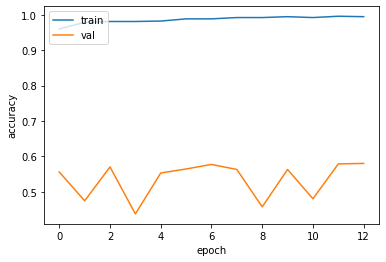

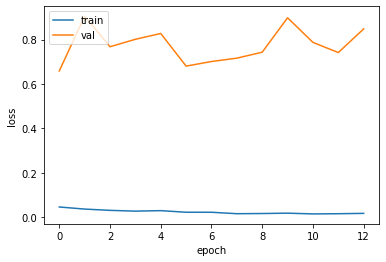

Epoch 1/13
13/13 [==============================] - 83s 6s/step - loss: 0.0389 - accuracy: 0.9740 - val_loss: 0.6512 - val_accuracy: 0.5400
Epoch 2/13
13/13 [==============================] - 84s 6s/step - loss: 0.0409 - accuracy: 0.9740 - val_loss: 0.7652 - val_accuracy: 0.5929
Epoch 3/13
13/13 [==============================] - 85s 7s/step - loss: 0.0304 - accuracy: 0.9802 - val_loss: 0.6789 - val_accuracy: 0.5000
Epoch 4/13
13/13 [==============================] - 84s 6s/step - loss: 0.0395 - accuracy: 0.9716 - val_loss: 0.6479 - val_accuracy: 0.5757
Epoch 5/13
13/13 [==============================] - 83s 6s/step - loss: 0.0216 - accuracy: 0.9938 - val_loss: 0.6015 - val_accuracy: 0.5171
Epoch 6/13
13/13 [==============================] - 83s 6s/step - loss: 0.0230 - accuracy: 0.9913 - val_loss: 0.5966 - val_accuracy: 0.5900
Epoch 7/13
13/13 [==============================] - 84s 6s/step - loss: 0.0239 - accuracy: 0.9852 - val_loss: 1.1672 - val_accuracy: 0.4400
Epoch 8/13
13/13 [==

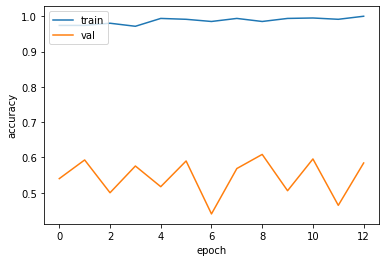

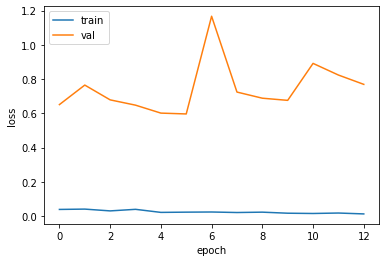

Epoch 1/13
13/13 [==============================] - 82s 6s/step - loss: 0.0379 - accuracy: 0.9753 - val_loss: 0.8758 - val_accuracy: 0.5843
Epoch 2/13
13/13 [==============================] - 84s 7s/step - loss: 0.0371 - accuracy: 0.9765 - val_loss: 0.7370 - val_accuracy: 0.5629
Epoch 3/13
13/13 [==============================] - 83s 6s/step - loss: 0.0299 - accuracy: 0.9839 - val_loss: 0.6900 - val_accuracy: 0.6029
Epoch 4/13
13/13 [==============================] - 84s 6s/step - loss: 0.0273 - accuracy: 0.9839 - val_loss: 0.6367 - val_accuracy: 0.5743
Epoch 5/13
13/13 [==============================] - 84s 6s/step - loss: 0.0240 - accuracy: 0.9926 - val_loss: 0.6052 - val_accuracy: 0.6114
Epoch 6/13
13/13 [==============================] - 83s 6s/step - loss: 0.0218 - accuracy: 0.9876 - val_loss: 0.7939 - val_accuracy: 0.6014
Epoch 7/13
13/13 [==============================] - 84s 7s/step - loss: 0.0282 - accuracy: 0.9876 - val_loss: 0.7284 - val_accuracy: 0.5329
Epoch 8/13
13/13 [==

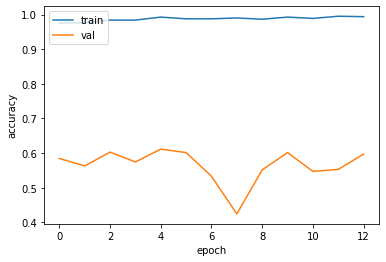

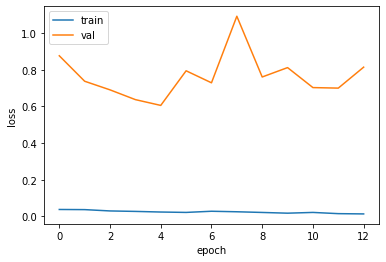

Epoch 1/13
13/13 [==============================] - 82s 6s/step - loss: 0.0521 - accuracy: 0.9642 - val_loss: 0.6776 - val_accuracy: 0.5400
Epoch 2/13
13/13 [==============================] - 84s 6s/step - loss: 0.0481 - accuracy: 0.9703 - val_loss: 0.9347 - val_accuracy: 0.5314
Epoch 3/13
13/13 [==============================] - 82s 6s/step - loss: 0.0390 - accuracy: 0.9876 - val_loss: 1.2922 - val_accuracy: 0.3543
Epoch 4/13
13/13 [==============================] - 85s 7s/step - loss: 0.0357 - accuracy: 0.9753 - val_loss: 0.6885 - val_accuracy: 0.5329
Epoch 5/13
13/13 [==============================] - 83s 6s/step - loss: 0.0330 - accuracy: 0.9802 - val_loss: 0.6965 - val_accuracy: 0.4343
Epoch 6/13
13/13 [==============================] - 82s 6s/step - loss: 0.0282 - accuracy: 0.9827 - val_loss: 0.6348 - val_accuracy: 0.5629
Epoch 7/13
13/13 [==============================] - 82s 6s/step - loss: 0.0211 - accuracy: 0.9975 - val_loss: 0.6811 - val_accuracy: 0.5000
Epoch 8/13
13/13 [==

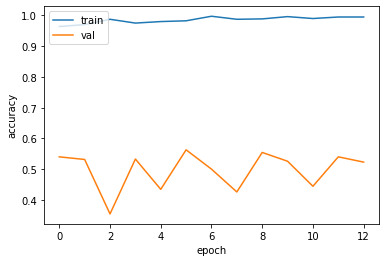

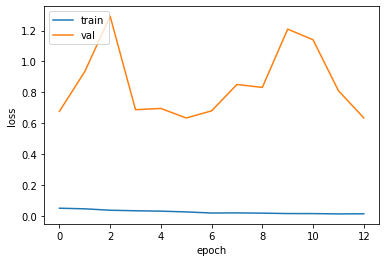

Epoch 1/13
13/13 [==============================] - 80s 6s/step - loss: 0.0515 - accuracy: 0.9604 - val_loss: 0.9386 - val_accuracy: 0.5257
Epoch 2/13
13/13 [==============================] - 85s 7s/step - loss: 0.0486 - accuracy: 0.9654 - val_loss: 0.6609 - val_accuracy: 0.5343
Epoch 3/13
13/13 [==============================] - 84s 7s/step - loss: 0.0461 - accuracy: 0.9642 - val_loss: 0.8796 - val_accuracy: 0.5514
Epoch 4/13
13/13 [==============================] - 83s 6s/step - loss: 0.0324 - accuracy: 0.9778 - val_loss: 0.7439 - val_accuracy: 0.4914
Epoch 5/13
13/13 [==============================] - 82s 6s/step - loss: 0.0294 - accuracy: 0.9790 - val_loss: 0.6630 - val_accuracy: 0.5043
Epoch 6/13
13/13 [==============================] - 84s 7s/step - loss: 0.0244 - accuracy: 0.9901 - val_loss: 0.9271 - val_accuracy: 0.5557
Epoch 7/13
13/13 [==============================] - 83s 6s/step - loss: 0.0235 - accuracy: 0.9852 - val_loss: 0.7219 - val_accuracy: 0.4971
Epoch 8/13
13/13 [==

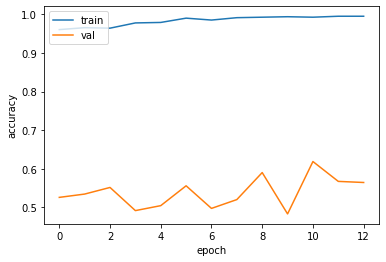

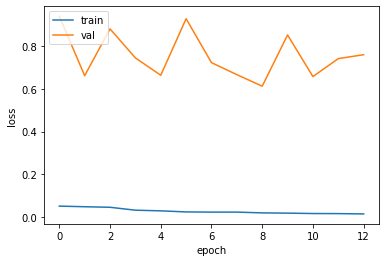

Epoch 1/13
13/13 [==============================] - 83s 6s/step - loss: 0.0550 - accuracy: 0.9518 - val_loss: 0.7563 - val_accuracy: 0.4586
Epoch 2/13
13/13 [==============================] - 83s 6s/step - loss: 0.0428 - accuracy: 0.9728 - val_loss: 0.9908 - val_accuracy: 0.5014
Epoch 3/13
13/13 [==============================] - 83s 6s/step - loss: 0.0439 - accuracy: 0.9666 - val_loss: 0.6681 - val_accuracy: 0.4929
Epoch 4/13
13/13 [==============================] - 82s 6s/step - loss: 0.0388 - accuracy: 0.9790 - val_loss: 0.7530 - val_accuracy: 0.5329
Epoch 5/13
13/13 [==============================] - 84s 6s/step - loss: 0.0324 - accuracy: 0.9802 - val_loss: 0.6978 - val_accuracy: 0.4771
Epoch 6/13
13/13 [==============================] - 83s 6s/step - loss: 0.0341 - accuracy: 0.9790 - val_loss: 0.5400 - val_accuracy: 0.5343
Epoch 7/13
13/13 [==============================] - 85s 7s/step - loss: 0.0274 - accuracy: 0.9778 - val_loss: 0.5821 - val_accuracy: 0.5871
Epoch 8/13
13/13 [==

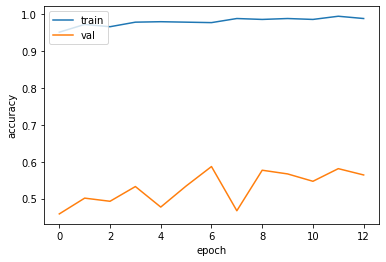

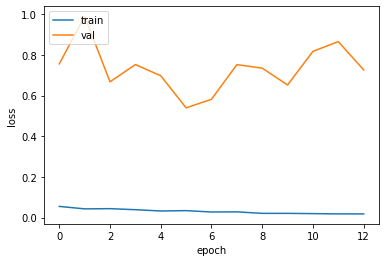

Epoch 1/13
13/13 [==============================] - 83s 6s/step - loss: 0.0551 - accuracy: 0.9555 - val_loss: 0.7545 - val_accuracy: 0.5686
Epoch 2/13
13/13 [==============================] - 84s 6s/step - loss: 0.0492 - accuracy: 0.9617 - val_loss: 0.6552 - val_accuracy: 0.5714
Epoch 3/13
13/13 [==============================] - 83s 6s/step - loss: 0.0420 - accuracy: 0.9728 - val_loss: 0.6002 - val_accuracy: 0.5343
Epoch 4/13
13/13 [==============================] - 83s 6s/step - loss: 0.0346 - accuracy: 0.9852 - val_loss: 0.6440 - val_accuracy: 0.4929
Epoch 5/13
13/13 [==============================] - 82s 6s/step - loss: 0.0293 - accuracy: 0.9852 - val_loss: 0.8829 - val_accuracy: 0.5571
Epoch 6/13
13/13 [==============================] - 83s 6s/step - loss: 0.0352 - accuracy: 0.9765 - val_loss: 0.5490 - val_accuracy: 0.5614
Epoch 7/13
13/13 [==============================] - 84s 7s/step - loss: 0.0294 - accuracy: 0.9802 - val_loss: 0.5672 - val_accuracy: 0.5929
Epoch 8/13
13/13 [==

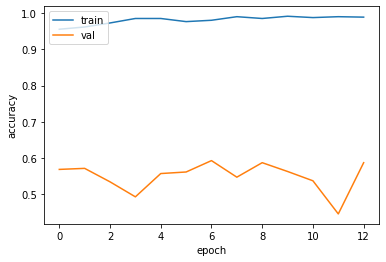

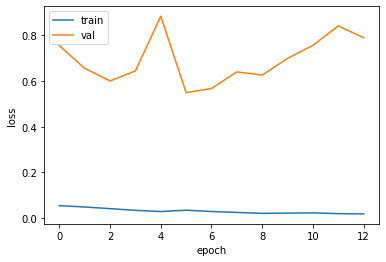

Epoch 1/13
13/13 [==============================] - 82s 6s/step - loss: 0.0665 - accuracy: 0.9580 - val_loss: 0.7528 - val_accuracy: 0.5771
Epoch 2/13
13/13 [==============================] - 84s 6s/step - loss: 0.0588 - accuracy: 0.9530 - val_loss: 0.6564 - val_accuracy: 0.5614
Epoch 3/13
13/13 [==============================] - 84s 6s/step - loss: 0.0470 - accuracy: 0.9654 - val_loss: 0.5754 - val_accuracy: 0.5914
Epoch 4/13
13/13 [==============================] - 82s 6s/step - loss: 0.0387 - accuracy: 0.9716 - val_loss: 0.5356 - val_accuracy: 0.5743
Epoch 5/13
13/13 [==============================] - 84s 7s/step - loss: 0.0314 - accuracy: 0.9765 - val_loss: 0.5991 - val_accuracy: 0.4986
Epoch 6/13
13/13 [==============================] - 84s 7s/step - loss: 0.0313 - accuracy: 0.9790 - val_loss: 0.6587 - val_accuracy: 0.5186
Epoch 7/13
13/13 [==============================] - 82s 6s/step - loss: 0.0246 - accuracy: 0.9852 - val_loss: 0.5887 - val_accuracy: 0.5671
Epoch 8/13
13/13 [==

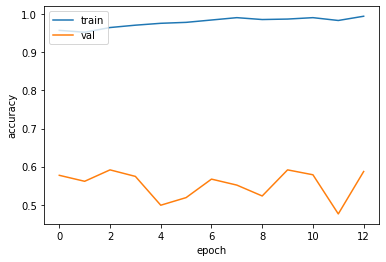

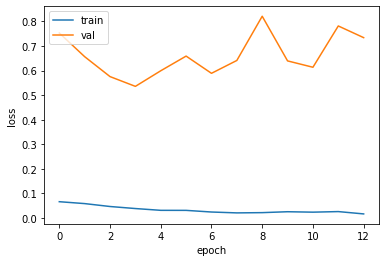

Epoch 1/13
13/13 [==============================] - 82s 6s/step - loss: 0.0597 - accuracy: 0.9555 - val_loss: 0.6416 - val_accuracy: 0.5629
Epoch 2/13
13/13 [==============================] - 84s 6s/step - loss: 0.0672 - accuracy: 0.9493 - val_loss: 0.6404 - val_accuracy: 0.5271
Epoch 3/13
13/13 [==============================] - 83s 6s/step - loss: 0.0643 - accuracy: 0.9444 - val_loss: 0.7935 - val_accuracy: 0.4357
Epoch 4/13
13/13 [==============================] - 83s 6s/step - loss: 0.0425 - accuracy: 0.9728 - val_loss: 0.6001 - val_accuracy: 0.5071
Epoch 5/13
13/13 [==============================] - 82s 6s/step - loss: 0.0353 - accuracy: 0.9790 - val_loss: 0.6106 - val_accuracy: 0.5314
Epoch 6/13
13/13 [==============================] - 86s 7s/step - loss: 0.0322 - accuracy: 0.9740 - val_loss: 0.6497 - val_accuracy: 0.4800
Epoch 7/13
13/13 [==============================] - 84s 7s/step - loss: 0.0315 - accuracy: 0.9778 - val_loss: 0.6851 - val_accuracy: 0.5171
Epoch 8/13
13/13 [==

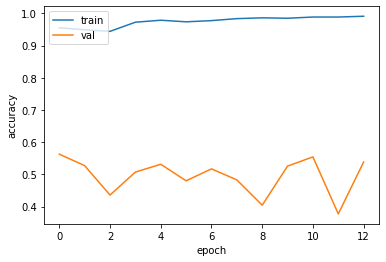

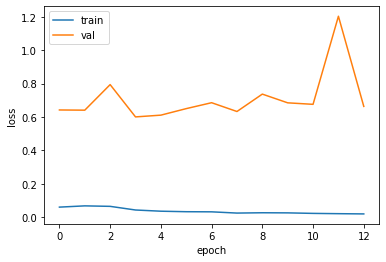

Epoch 1/13
13/13 [==============================] - 81s 6s/step - loss: 0.0702 - accuracy: 0.9357 - val_loss: 0.6273 - val_accuracy: 0.5786
Epoch 2/13
13/13 [==============================] - 84s 6s/step - loss: 0.0505 - accuracy: 0.9666 - val_loss: 0.6411 - val_accuracy: 0.4814
Epoch 3/13
13/13 [==============================] - 84s 6s/step - loss: 0.0480 - accuracy: 0.9691 - val_loss: 0.5729 - val_accuracy: 0.5757
Epoch 4/13
13/13 [==============================] - 83s 6s/step - loss: 0.0449 - accuracy: 0.9654 - val_loss: 0.6839 - val_accuracy: 0.5243
Epoch 5/13
13/13 [==============================] - 84s 7s/step - loss: 0.0408 - accuracy: 0.9740 - val_loss: 0.5821 - val_accuracy: 0.5143
Epoch 6/13
13/13 [==============================] - 83s 6s/step - loss: 0.0346 - accuracy: 0.9790 - val_loss: 0.5391 - val_accuracy: 0.5643
Epoch 7/13
13/13 [==============================] - 83s 6s/step - loss: 0.0295 - accuracy: 0.9790 - val_loss: 0.7807 - val_accuracy: 0.4671
Epoch 8/13
13/13 [==

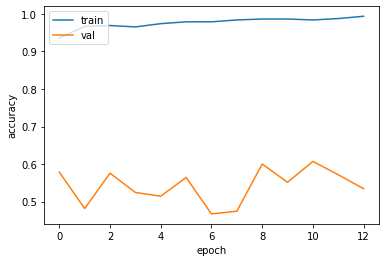

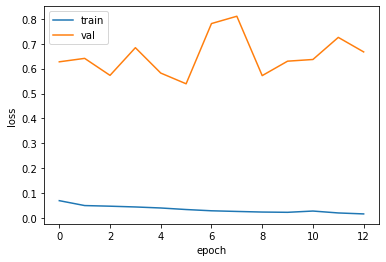

In [12]:
Path     =  'E:/cancer de pele/validação/0-validacao.pckl'
f = open(Path, 'rb')
[Xa,Ya] = pickle.load(f)
Ya = np.array(Ya)


plot_hist = []
plot_val_hist = []
plot_loss = []
plot_val_loss = []
model = []
acc = []
val_acc = []

for i in range(11):
    save_history = p1 + 'rede1/results/' + str(train) + '/history-' + str(i) + '.png'
    save_history1 = p1 + 'rede1/results/' + str(train) + '/GLOBAL-history-' + str(train) + '.png'
    save_loss    = p1 + 'rede1/results/' + str(train) +  '/loss-' + str(i) + '.png'
    save_loss1    = p1 + 'rede1/results/' + str(train) +  '/GLOBAL-loss-' + str(train) + '.png'
    save_model   = p1 + 'rede1/modelo/' + str(train) + '/ModelCancer-' + str(i) + '.h5'
    Path         = p1 + 'TRAIN/'+ str(train) + '/' + str(i) + '-Data.pckl' #local onde as 8 amostras estão
    f = open(Path, 'rb')
    [Xt,Yt] = pickle.load(f)
    Yt = np.array(Yt)
    Xt = Xt.astype(int)
    
    
    # save fit model
    history = ModelCancer.fit(x = Xt, y = Yt, batch_size = 2**6, epochs = 13, validation_data=(Xa, Ya))
     #save model
    ModelCancer.save(save_model)
    
    model.append(i)
    acc.append(history.history['accuracy'][6])
    val_acc.append(history.history['val_accuracy'][6])
    plot_hist.extend(history.history['accuracy'])
    plot_val_hist.extend(history.history['val_accuracy'])
    plot_loss.extend(history.history['loss'])
    
    plot_val_loss.extend(history.history['val_loss'])
    
    # save validation fit model
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig(save_history, format='png')
    plt.show()
   
    # save validation loss model
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig(save_loss, format='png')
    plt.show()

# PLOT TRAINING

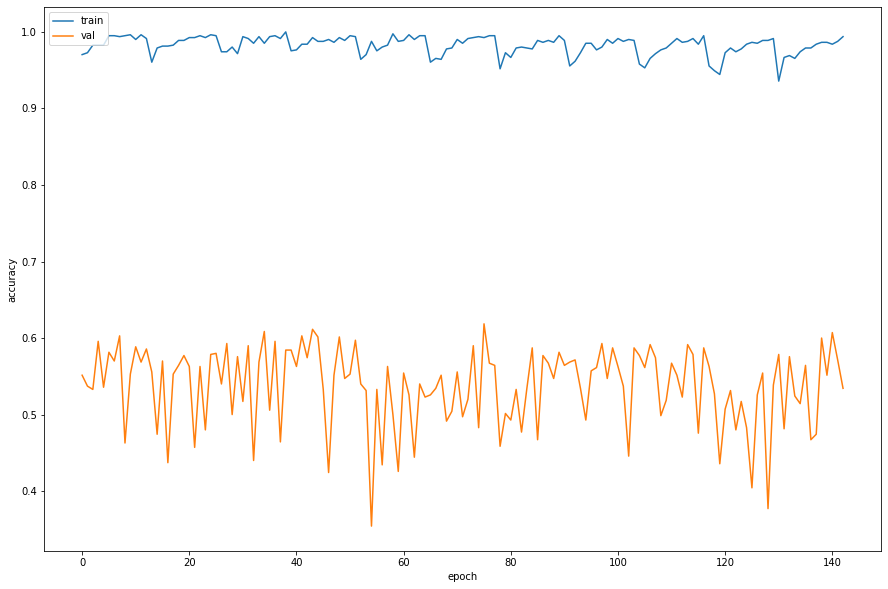

In [13]:
plt.figure(figsize = (15,10))
plt.plot(plot_hist)
plt.plot(plot_val_hist)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'loss', 'val_loss'], loc='upper left')
plt.savefig(save_history1, format='png')
plt.show()

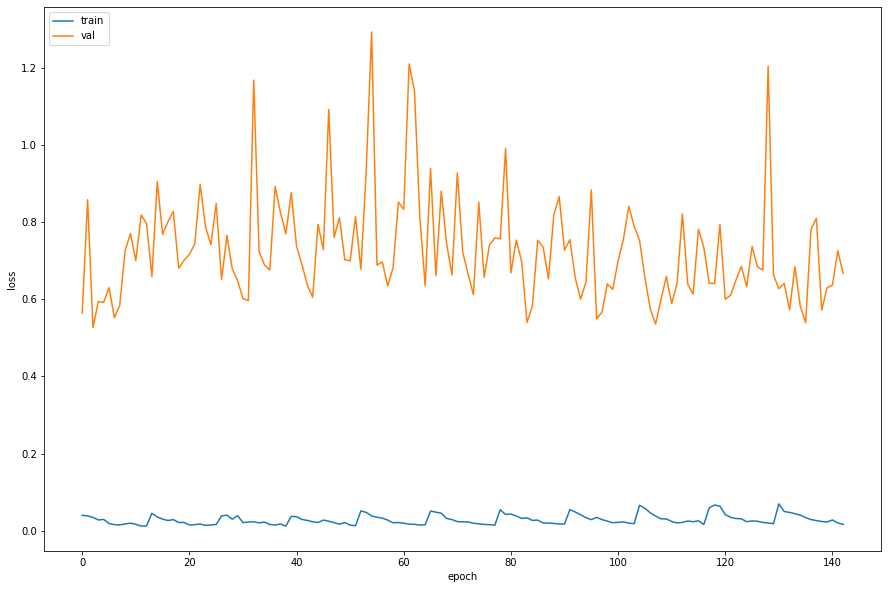

In [14]:
plt.figure(figsize = (15,10))
plt.plot(plot_loss)
plt.plot(plot_val_loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'loss', 'val_loss'], loc='upper left')
plt.savefig(save_loss1, format='png')
plt.show()

In [ ]:
data = {'Model': model,
        'acc': acc,
        'val_acc': val_acc}

df = pd.DataFrame(data, columns = ['Model', 'acc', 'val_acc'])
df.to_excel(p1 + 'rede1/results/' + str(train) + '/cancer-acc' + str(train) + '.xlsx')
df.head(10)

In [ ]:
#import winsound
#frequency = 2500  # Set Frequency To 2500 Hertz
#duration = 1000  # Set Duration To 1000 ms == 1 second
#winsound.Beep(frequency, duration)

In [ ]:
os.system("shutdown -s")